# Merge, Join, and Concatenate

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('/Users/ivanazhao/Desktop/Data Analysis/Pandas Tutorial/LOTR.csv')
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [3]:
df2 = pd.read_csv('/Users/ivanazhao/Desktop/Data Analysis/Pandas Tutorial/LOTR 2.csv')
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [4]:
df1.merge(df2)   # default is inner join   # Shift+tab help you check detail info of functions

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [5]:
df1.merge(df2, how = "inner", on = ['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [6]:
df1.merge(df2, how = 'outer')  # if cannot find join, show NaN (not a number)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [7]:
df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [8]:
df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [9]:
df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [10]:
df1.join(df2, on='FellowshipID', how = 'outer', lsuffix = '_left', rsuffix='_right')

,FellowshipID,FellowshipID_left,FirstName_left,Skills,FellowshipID_right,FirstName_right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0


In [14]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'),lsuffix = '_left', rsuffix='_right', how = 'outer' )
df4

,FirstName_left,Skills,FirstName_right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


In [15]:
pd.concat([df1,df2]) # df1 and df2 堆在一起

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [16]:
pd.concat([df1,df2], join = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [17]:
pd.concat([df1,df2], join = 'outer', axis = 1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


# Pandas Visualization


In [21]:
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/ivanazhao/Desktop/Data Analysis/Pandas Tutorial/Ice Cream Ratings.csv')
df = df.set_index('Date')
df

,Flavor Rating,Texture Rating,Overall Rating
Date,,,
1/1/2022,0.223090,0.040220,0.600129
1/2/2022,0.635886,0.938476,0.106264
1/3/2022,0.442323,0.044154,0.598112
1/4/2022,0.389128,0.549676,0.489353
1/5/2022,0.386887,0.519439,0.988280
1/6/2022,0.877984,0.193588,0.832827
1/7/2022,0.140995,0.325110,0.105147


In [45]:
print(plt.style.available)

plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Date'>

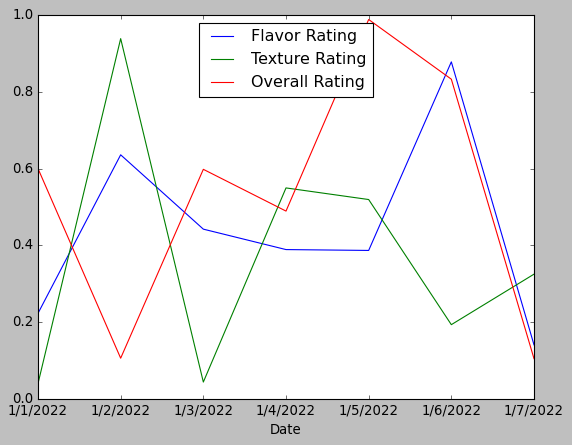

In [46]:
df.plot()  # default = line

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

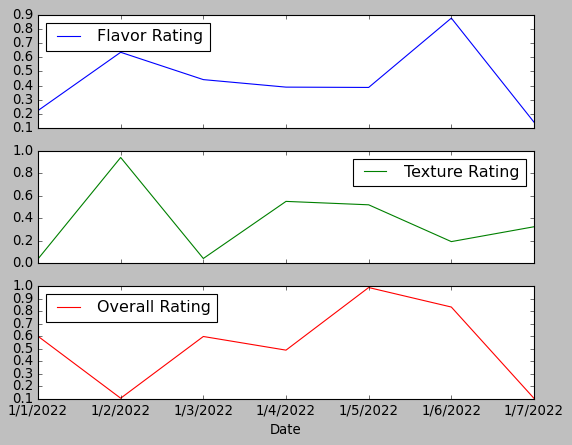

In [47]:
df.plot(kind = 'line', subplots = True)

<AxesSubplot:title={'center':'Ice Cream Ratings'}, xlabel='Date Rating', ylabel='Scores'>

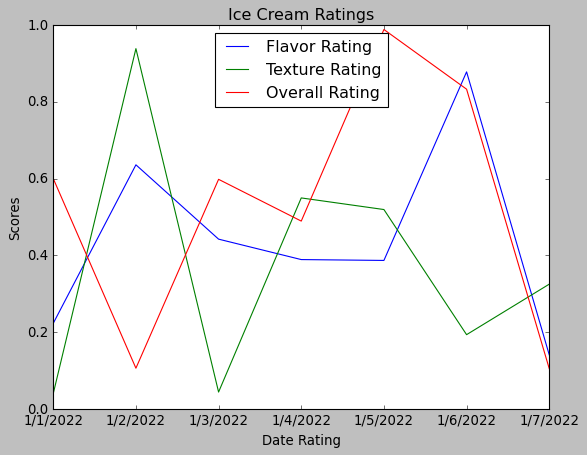

In [48]:
df.plot(title = 'Ice Cream Ratings', xlabel = 'Date Rating', ylabel = 'Scores') 

<AxesSubplot:xlabel='Date'>

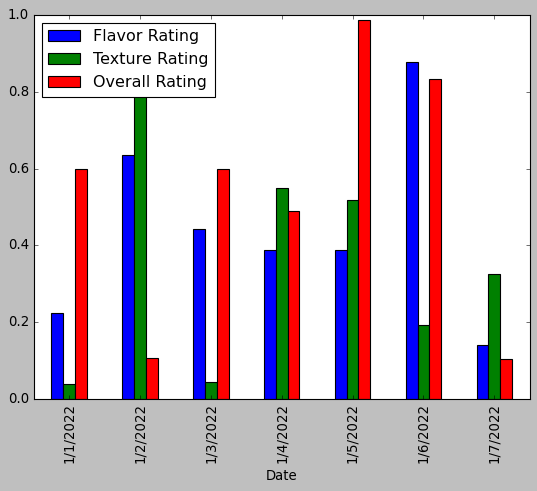

In [49]:
df.plot(kind = 'bar')

<AxesSubplot:xlabel='Date'>

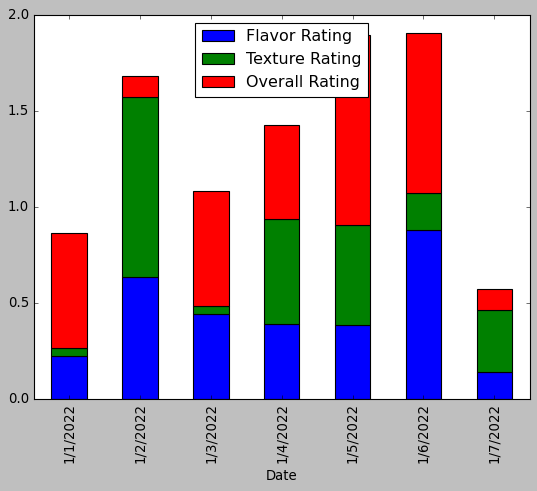

In [50]:
df.plot(kind = 'bar', stacked = True)

<AxesSubplot:ylabel='Date'>

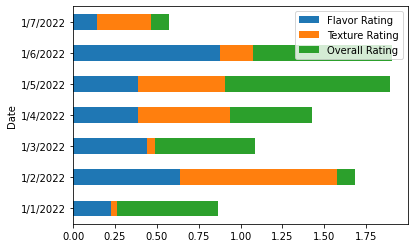

In [32]:
df.plot.barh(stacked = True)

<AxesSubplot:xlabel='Flavor Rating', ylabel='Texture Rating'>

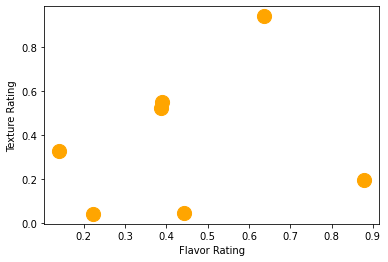

In [37]:
df.plot.scatter(x = 'Flavor Rating', y = 'Texture Rating', s = 200, c = 'orange')  # s - size; c - color

<AxesSubplot:ylabel='Frequency'>

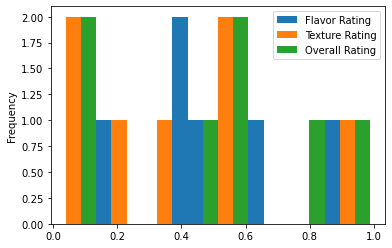

In [38]:
df.plot.hist(bins = 20)

<AxesSubplot:>

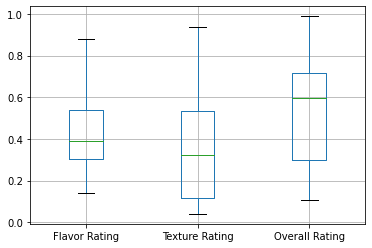

In [39]:
df.boxplot()     # green line is median 

<AxesSubplot:xlabel='Date'>

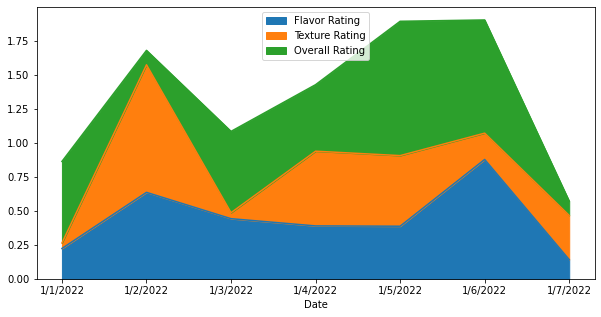

In [41]:
df.plot.area(figsize = (10,5))

<AxesSubplot:ylabel='Flavor Rating'>

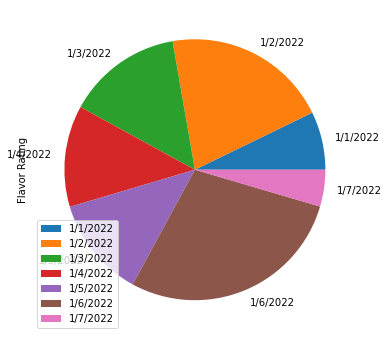

In [43]:
df.plot.pie(y = 'Flavor Rating', figsize = (10,6))